# Project Overview and Dataset

### Our task is to classify a patient as either having diabtes (class1) or no diabetes(class0).

### We use<b> Pima Diabetes Database</b> which is available on <a href = https://www.kaggle.com> Kaggle </a> You can view and download the dataset from this  <a href = https://www.kaggle.com/uciml/pima-indians-diabetes-database> Link <a>. 

## Read Dataset

In [1]:
# To read dataset with pandas.
import pandas as pd

data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# To know you have Missing values in dataset.
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Splitting dataset to input and output

In [3]:
# Split data into input and output.
data_input = data.drop( columns = ['Outcome'] )
data_output = data['Outcome']

In [4]:
# Show input from dataset only.
data_input.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
# Show output from dataset only.
data_output.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Splitting dataset to (Training, Validation and Testing)

In [6]:
# Split data into tree parts ( Training , Valdiation , Testing ).
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(data_input, data_output, test_size = 0.2 , random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.33 , random_state = 1)

In [7]:
# Show all columns only of ( Training , Valdiation , Testing ).
print(x_train.shape[0])
print(x_val.shape[0])
print(x_test.shape[0])

411
203
154


## Feature Scaling

In [8]:
# The first type of ensemble.
from sklearn.preprocessing import StandardScaler

In [9]:
# Take object from StandardScaler.
scaler = StandardScaler()

In [10]:
# Training Model.
scaler.fit(x_train)

StandardScaler()

In [11]:
# The range of input data is very defferent so that make it in nearly range. ( Using ==> transform )
x_train_scaler = scaler.transform(x_train)
x_val_scaler = scaler.transform(x_val)
x_test_scaler = scaler.transform(x_test)

## Helper Function: Evaluate Classifier

In [12]:
# Calculate accuracy of traing.
from sklearn.metrics import accuracy_score

def evalute_model(clf, x_train, x_val, y_train, y_val):
    
    """
    This Function is used to take any model and traing it then predict output and caluclate accuracy.
    Input:
    clf ==> Any model need to calculate accuracy.
    x_train ==> Part of dataset that train data with it.
    x_val ==> Part of dataset that see the validation of data with it.
    Output:
    y_train ==> Part of dataset that train data with it.
    y_val ==> Part of dataset that see the validation of data with it.
    Calculate accuracy of training and validation and return them.
    """
    # Train Model.
    clf.fit(x_train, y_train)
    
    # Predict values of Train and valdation.
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_val)
    
    # Calculate accuracy of train and testing.
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    
    print(clf.__class__.__name__)
    print("Accuracy of training: ",acc_train)
    print("Accuracy of valdation: ",acc_val)
    print('-------------------------------------')
    return acc_train, acc_val

# Voting Classifier

In [13]:
# Calling all the model that use it with using sklearn.
# Calling VotingClassifier from ensemble. VotingClassifier ==> Take the choice of the most of model choice it.

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [14]:
# Using all model and give him the hyperparameter.
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 1)
logistic_clf = LogisticRegression(random_state = 1)
svc_clf = SVC(random_state = 1)

In [15]:
# Calculate the best max_depth should use in decision tree.
max_depth_values = [1,2,3,4,5,6,7,8]
acc_train_values = []
acc_val_values = []

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 1)
    acc_train, acc_val = evalute_model(model, x_train_scaler, x_val_scaler, y_train, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)

DecisionTreeClassifier
Accuracy of training:  0.7347931873479319
Accuracy of valdation:  0.7389162561576355
-------------------------------------
DecisionTreeClassifier
Accuracy of training:  0.7396593673965937
Accuracy of valdation:  0.6945812807881774
-------------------------------------
DecisionTreeClassifier
Accuracy of training:  0.7980535279805353
Accuracy of valdation:  0.7339901477832512
-------------------------------------
DecisionTreeClassifier
Accuracy of training:  0.8199513381995134
Accuracy of valdation:  0.7192118226600985
-------------------------------------
DecisionTreeClassifier
Accuracy of training:  0.8418491484184915
Accuracy of valdation:  0.7044334975369458
-------------------------------------
DecisionTreeClassifier
Accuracy of training:  0.8613138686131386
Accuracy of valdation:  0.6502463054187192
-------------------------------------
DecisionTreeClassifier
Accuracy of training:  0.8905109489051095
Accuracy of valdation:  0.6945812807881774
----------------

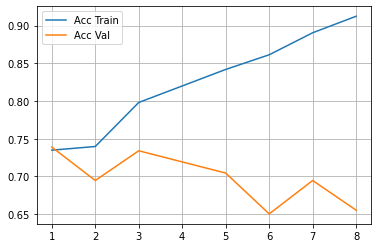

In [16]:
# Draw diagram to show the best max_dpth should use.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(max_depth_values, acc_train_values, label = 'Acc Train')
plt.plot(max_depth_values, acc_val_values, label = 'Acc Val')
plt.legend()
plt.grid(axis = 'both')
plt.show()

In [17]:
# Put all models in list of tuples.
estimaters = [
    ('tree',tree_clf),
    ('logistic',logistic_clf),
    ('svc',svc_clf)
]

voting_clf = VotingClassifier(estimaters)

In [18]:
# Add voting_classifier to estimaters.
all_estimaters = estimaters + [('voting_clf',voting_clf)]

# Make three list to have ( name of model , accuracy_train , accuracy_val )
results = {
    
    'model': [],
    'acc_train':[],
    'acc_val':[]      
}

for (name,clf) in all_estimaters:
    acc_train , acc_val = evalute_model(clf, x_train_scaler,
                                        x_val_scaler, y_train, y_val)
    results['model'].append(name)
    results['acc_train'].append(acc_train)
    results['acc_val'].append(acc_val)

DecisionTreeClassifier
Accuracy of training:  0.7980535279805353
Accuracy of valdation:  0.7339901477832512
-------------------------------------
LogisticRegression
Accuracy of training:  0.7761557177615572
Accuracy of valdation:  0.7733990147783252
-------------------------------------
SVC
Accuracy of training:  0.8272506082725061
Accuracy of valdation:  0.7487684729064039
-------------------------------------
VotingClassifier
Accuracy of training:  0.8126520681265207
Accuracy of valdation:  0.7684729064039408
-------------------------------------


In [19]:
# Show all the result of model and voting_classifier either.
results

{'model': ['tree', 'logistic', 'svc', 'voting_clf'],
 'acc_train': [0.7980535279805353,
  0.7761557177615572,
  0.8272506082725061,
  0.8126520681265207],
 'acc_val': [0.7339901477832512,
  0.7733990147783252,
  0.7487684729064039,
  0.7684729064039408]}

In [20]:
# To be data very readble to read it should use DataFrame.
result_df = pd.DataFrame(results)

result_df

,model,acc_train,acc_val
0,tree,0.798054,0.733990
1,logistic,0.776156,0.773399
2,svc,0.827251,0.748768
3,voting_clf,0.812652,0.768473


# Bagging

In [21]:
# Bagging type of ensemble model. Ensemble Model dependant of ==> ( use alot of model in the same dataset )
from sklearn.ensemble import BaggingClassifier

In [22]:
best_values = [20,30,60,80,100,120,140,160]
acc_train_values = []
acc_val_values = []

for best_value in best_values:
    model = BaggingClassifier(
    LogisticRegression(random_state = 1), n_estimators = best_value,
    max_samples = 0.75, bootstrap = True, random_state = 1, n_jobs = -1,
)
    acc_train_bag, acc_val_bag = evalute_model(model, x_train_scaler, x_val_scaler, y_train, y_val)
    acc_train_values.append(acc_train_bag)
    acc_val_values.append(acc_val_bag)

BaggingClassifier
Accuracy of training:  0.7688564476885644
Accuracy of valdation:  0.7783251231527094
-------------------------------------
BaggingClassifier
Accuracy of training:  0.7688564476885644
Accuracy of valdation:  0.7881773399014779
-------------------------------------
BaggingClassifier
Accuracy of training:  0.7712895377128953
Accuracy of valdation:  0.7832512315270936
-------------------------------------
BaggingClassifier
Accuracy of training:  0.7664233576642335
Accuracy of valdation:  0.7783251231527094
-------------------------------------
BaggingClassifier
Accuracy of training:  0.7737226277372263
Accuracy of valdation:  0.7832512315270936
-------------------------------------
BaggingClassifier
Accuracy of training:  0.7761557177615572
Accuracy of valdation:  0.7832512315270936
-------------------------------------
BaggingClassifier
Accuracy of training:  0.7712895377128953
Accuracy of valdation:  0.7783251231527094
-------------------------------------
BaggingClassi

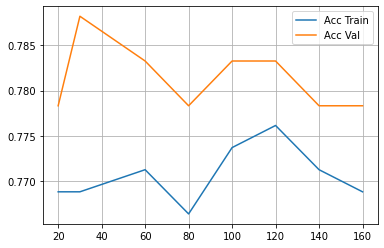

In [23]:
plt.plot(best_values, acc_train_values, label = "Acc Train")
plt.plot(best_values, acc_val_values, label = 'Acc Val')
plt.legend()
plt.grid(axis = 'both')
plt.show()

In [24]:
# Bagging / Pasting { be pasting if need to use Pasting ==> ( bootstrap = False ) }

# Call bagginf and use hyperparameter specific.
bag_clf = BaggingClassifier(
    LogisticRegression(random_state = 1), n_estimators = 120,
    max_samples = 0.75, bootstrap = True, random_state = 1, n_jobs = -1,
)

acc_train_bag, acc_val_bag = evalute_model(bag_clf, x_train_scaler, x_val_scaler, y_train, y_val)

BaggingClassifier
Accuracy of training:  0.7761557177615572
Accuracy of valdation:  0.7832512315270936
-------------------------------------


# Random Forest

In [25]:
# Using another type of ensemble called RandomForestClassifier.
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 250, max_depth = 6, random_state = 1)

acc_train_rf, acc_val_rf = evalute_model(rf_clf, x_train_scaler,
                                   x_val_scaler, y_train, y_val)

RandomForestClassifier
Accuracy of training:  0.9099756690997567
Accuracy of valdation:  0.7536945812807881
-------------------------------------


In [26]:
max_depth_values = [1,2,3,4,5,6,7,8]
acc_train_values = []
acc_val_values = []

for max_depth in max_depth_values:
    model = RandomForestClassifier(n_estimators = 250, max_depth = max_depth, random_state = 1)
    acc_train, acc_val = evalute_model(model, x_train_scaler,
                                   x_val_scaler, y_train, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)

RandomForestClassifier
Accuracy of training:  0.7055961070559611
Accuracy of valdation:  0.6650246305418719
-------------------------------------
RandomForestClassifier
Accuracy of training:  0.7737226277372263
Accuracy of valdation:  0.729064039408867
-------------------------------------
RandomForestClassifier
Accuracy of training:  0.8223844282238443
Accuracy of valdation:  0.729064039408867
-------------------------------------
RandomForestClassifier
Accuracy of training:  0.851581508515815
Accuracy of valdation:  0.7487684729064039
-------------------------------------
RandomForestClassifier
Accuracy of training:  0.8734793187347932
Accuracy of valdation:  0.7438423645320197
-------------------------------------
RandomForestClassifier
Accuracy of training:  0.9099756690997567
Accuracy of valdation:  0.7536945812807881
-------------------------------------
RandomForestClassifier
Accuracy of training:  0.9440389294403893
Accuracy of valdation:  0.7438423645320197
-------------------

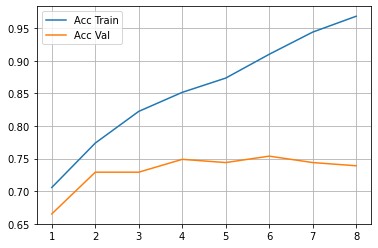

In [27]:
plt.plot(max_depth_values, acc_train_values, label = "Acc Train")
plt.plot(max_depth_values, acc_val_values, label = 'Acc Val')
plt.legend()
plt.grid(axis = 'both')
plt.show()

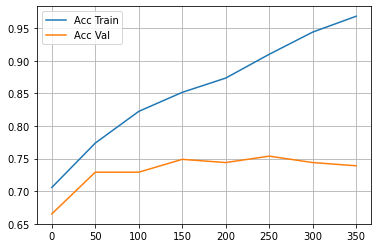

In [28]:
estimate_values = [0,50,100,150,200,250,300,350]

plt.plot(estimate_values, acc_train_values, label = "Acc Train")
plt.plot(estimate_values, acc_val_values, label = 'Acc Val')
plt.legend()
plt.grid(axis = 'both')
plt.show()

# Extemely Random Treees(Extra-Trees)

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

ex_clf = ExtraTreesClassifier(n_estimators = 250, max_depth = 7, random_state = 1)

acc_train_ex, acc_val_ex = evalute_model(ex_clf, x_train_scaler,
                                   x_val_scaler, y_train, y_val)

ExtraTreesClassifier
Accuracy of training:  0.8613138686131386
Accuracy of valdation:  0.7586206896551724
-------------------------------------


In [30]:
max_depth_values = [1,2,3,4,5,6,7,8]
acc_train_values = []
acc_val_values = []

for max_depth in max_depth_values:
    model = ExtraTreesClassifier(n_estimators = 250, max_depth = max_depth, random_state = 1)
    acc_train_ex, acc_val_ex = evalute_model(model, x_train_scaler,
                                   x_val_scaler, y_train, y_val)
    acc_train_values.append(acc_train_ex)
    acc_val_values.append(acc_val_ex)

ExtraTreesClassifier
Accuracy of training:  0.656934306569343
Accuracy of valdation:  0.645320197044335
-------------------------------------
ExtraTreesClassifier
Accuracy of training:  0.681265206812652
Accuracy of valdation:  0.645320197044335
-------------------------------------
ExtraTreesClassifier
Accuracy of training:  0.7128953771289538
Accuracy of valdation:  0.6699507389162561
-------------------------------------
ExtraTreesClassifier
Accuracy of training:  0.7518248175182481
Accuracy of valdation:  0.7142857142857143
-------------------------------------
ExtraTreesClassifier
Accuracy of training:  0.7931873479318735
Accuracy of valdation:  0.7389162561576355
-------------------------------------
ExtraTreesClassifier
Accuracy of training:  0.8272506082725061
Accuracy of valdation:  0.7536945812807881
-------------------------------------
ExtraTreesClassifier
Accuracy of training:  0.8613138686131386
Accuracy of valdation:  0.7586206896551724
----------------------------------

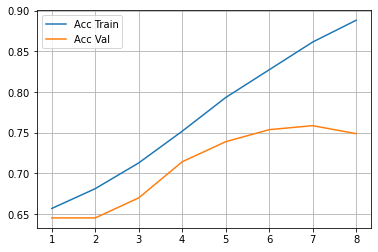

In [31]:
plt.plot(max_depth_values, acc_train_values, label = "Acc Train")
plt.plot(max_depth_values, acc_val_values, label = 'Acc Val')
plt.legend()
plt.grid(axis = 'both')
plt.show()

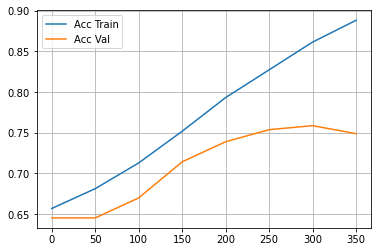

In [32]:
estimate_values = [0,50,100,150,200,250,300,350]

plt.plot(estimate_values, acc_train_values, label = "Acc Train")
plt.plot(estimate_values, acc_val_values, label = 'Acc Val')
plt.legend()
plt.grid(axis = 'both')
plt.show()

# Adaptive Boosting

In [33]:
# Using new type of ensemble called AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 60, random_state = 1),
    n_estimators = 500,
    learning_rate = 0.05,
    random_state = 1

)

acc_train_ada, acc_val_ada = evalute_model(ada_clf, x_train_scaler,
                                           x_val_scaler, y_train, y_val)

AdaBoostClassifier
Accuracy of training:  0.8734793187347932
Accuracy of valdation:  0.7586206896551724
-------------------------------------


# Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gbct_clf = GradientBoostingClassifier(max_depth = 1, n_estimators = 300,
                                      learning_rate = 0.1, random_state = 1)

acc_train_gbct, acc_val_gbct = evalute_model(gbct_clf, x_train_scaler,
                                           x_val_scaler, y_train, y_val)

GradientBoostingClassifier
Accuracy of training:  0.8369829683698297
Accuracy of valdation:  0.7536945812807881
-------------------------------------


# Comparing Results

In [35]:
# Make dictonary to put model, acc_train and acc_val.
all_results = {
    'model': [],
    'acc_train': [],
    'acc_val': []
}

# 
all_results['model'] = results['model'] + ['bagging','rf','ex','ada','gbct']
all_results['acc_train'] = results['acc_train'] + [acc_train_bag,acc_train_rf,acc_train_ex,
                                                   acc_train_ada,acc_train_gbct]
all_results['acc_val'] = results['acc_val'] + [acc_val_bag,acc_val_rf,acc_val_ex,
                                               acc_val_ada,acc_val_gbct]

In [36]:
# Using pandas to put data in Frame.
all_results_df = pd.DataFrame(all_results)

all_results_df = all_results_df.sort_values(by = 'acc_val',
                                            ascending = False, ignore_index = True)# ignore_index ==> Not interest of arrange.

In [37]:
all_results_df

,model,acc_train,acc_val
0,bagging,0.776156,0.783251
1,logistic,0.776156,0.773399
2,voting_clf,0.812652,0.768473
3,ada,0.873479,0.758621
4,rf,0.909976,0.753695
5,gbct,0.836983,0.753695
6,svc,0.827251,0.748768
7,ex,0.888078,0.748768
8,tree,0.798054,0.733990


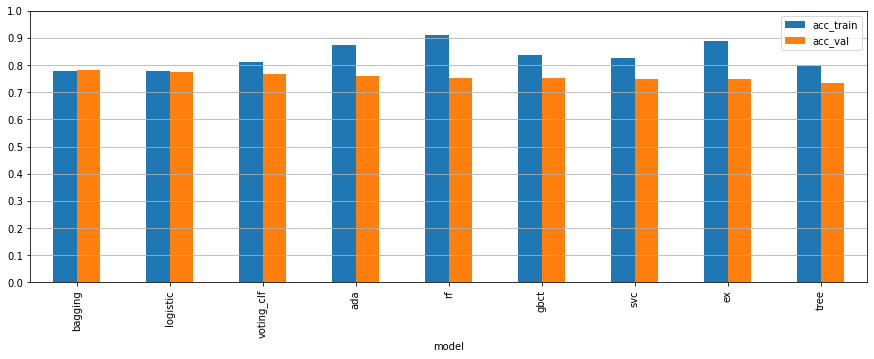

In [38]:
# Graph to compare between model.
import numpy as np

all_results_df.plot.bar(x = 'model', y = ['acc_train', 'acc_val'], figsize = (15, 5))
plt.yticks(np.arange(0.0,1.1,0.1))
plt.grid(axis = 'y')
plt.legend()
plt.show()

# Testing

In [39]:
# Take the best Model.
best_model = BaggingClassifier(
    LogisticRegression(random_state = 1), n_estimators = 100,
    max_samples = 0.75, bootstrap = True, random_state = 1, n_jobs = -1,
)

In [40]:
# Train Model.
best_model.fit(x_train_scaler,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  max_samples=0.75, n_estimators=100, n_jobs=-1,
                  random_state=1)

In [41]:
# Predict the values of train and validation.
y_pred_test = best_model.predict(x_test_scaler)

In [42]:
# Calculate accuracy of train and testing.
accuracy_score(y_test,y_pred_test)

0.7922077922077922

In [43]:
# Save the complete model.
import pickle

with open('saved-model.pickle','wb')as f:
    pickle.dump(best_model,f)